In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import layers, initializers
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets

### 1. Data Exploration

In [3]:
#Read data frame
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.shape

(9879, 40)

In [4]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [5]:
# No nulls in this dataset
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [6]:
# Unqiue count: No duplicates found since the number of unique GameIDs = n of rows
df.nunique()

gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

In [7]:
# Explore the values within the target variable. Almost perfect symmetry in our target column.
pivot_table = df.pivot_table(index='blueWins', aggfunc='size')
print(pivot_table)

blueWins
0    4949
1    4930
dtype: int64


### 2. Correlation matrix

The column blueWins is the target value. A value of 1 means the blue team has won. 0 otherwise.
I'll rename it to "Win"

In [8]:
# Change blueWins name
df.rename(columns={'blueWins': 'Win'}, inplace=True)

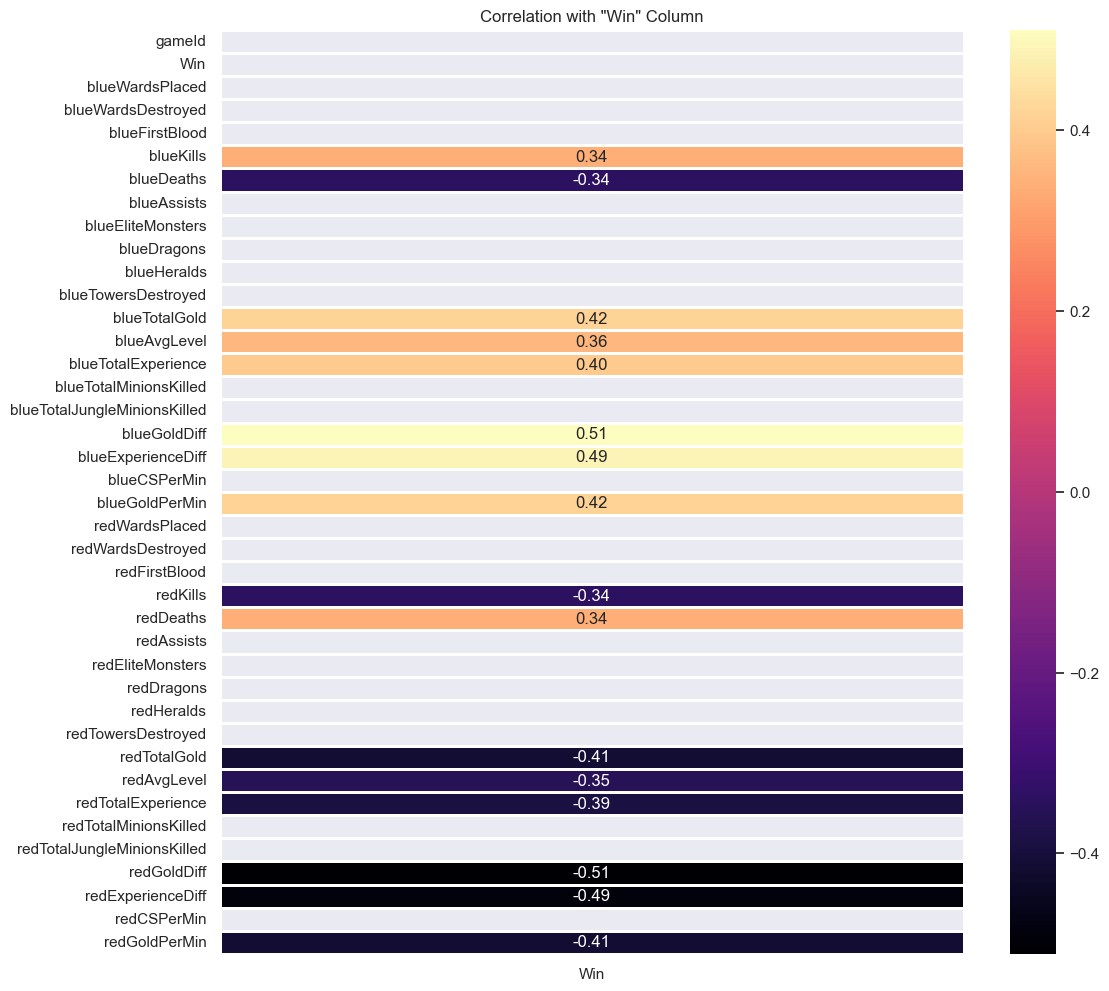

In [9]:
# Set the size of the visualization
sns.set(rc={'figure.figsize':(12,12)})

# Create correlation DataFrame
corr = df.corr()

# Filter out values between 0.3 and -0.3, and those equal to 1
filtered_corr = corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)]

# Calculate correlations with the "Win" column
win_correlations = filtered_corr['Win']

# Plot the correlations
sns.heatmap(pd.DataFrame(win_correlations), cmap='magma', annot=True, linewidths=-2, fmt='.2f')
plt.title('Correlation with "Win" Column')
plt.show()

In [10]:
# Let's create a dataset with only the columns with significant corr.

filtered_corr = filtered_corr[filtered_corr['Win'].notnull()]
# Filter the columns based on correlation threshold
significant_columns = filtered_corr.index.tolist()
significant_columns.append('Win')
# Create the new DataFrame with significant columns
df_corr = df[significant_columns].copy()

#16 features instead of 39
df_corr.shape

(9879, 17)

### 3. Feature Selection (Lasso)

We have two existing datasets: the complete dataset and a dataset focused on correlations. 
To further refine our analysis, we will create a third dataset by employing the Lasso method for feature selection. 

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop('Win', axis=1)  # Features
y = df['Win']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha value to control the level of regularization
lasso.fit(X_train, y_train)

# Retrieve the coefficient values and corresponding feature names
coefficients = lasso.coef_
feature_names = X.columns

# Print the coefficient values and feature names
for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")


Feature: gameId, Coefficient: -7.487283570546734e-11
Feature: blueWardsPlaced, Coefficient: -0.0
Feature: blueWardsDestroyed, Coefficient: 0.0
Feature: blueFirstBlood, Coefficient: 0.0
Feature: blueKills, Coefficient: 0.0
Feature: blueDeaths, Coefficient: -0.0
Feature: blueAssists, Coefficient: 0.0
Feature: blueEliteMonsters, Coefficient: 0.0
Feature: blueDragons, Coefficient: 0.0
Feature: blueHeralds, Coefficient: 0.0
Feature: blueTowersDestroyed, Coefficient: -0.0
Feature: blueTotalGold, Coefficient: 2.3773237991953385e-05
Feature: blueAvgLevel, Coefficient: -0.0
Feature: blueTotalExperience, Coefficient: 1.856660634552626e-05
Feature: blueTotalMinionsKilled, Coefficient: -0.00027587702083458715
Feature: blueTotalJungleMinionsKilled, Coefficient: 0.0006351186358047493
Feature: blueGoldDiff, Coefficient: 5.417311946180791e-05
Feature: blueExperienceDiff, Coefficient: 2.0805198118251186e-05
Feature: blueCSPerMin, Coefficient: -0.0
Feature: blueGoldPerMin, Coefficient: 0.0
Feature: redW

In [12]:
# Create a dictionary with feature names as keys and coefficients as values
data = {'Feature': feature_names, 'Coefficient': coefficients}

# Create a DataFrame from the dictionary
df_coefficients = pd.DataFrame(data)

best_features = df_coefficients[df_coefficients['Coefficient'] != 0]
best_features

# By using a coeff of 0.01, we cut our features to only 13!
#print('total features:' + str(len(best_features)))

,Feature,Coefficient
0,gameId,-7.487284e-11
11,blueTotalGold,2.377324e-05
13,blueTotalExperience,1.856661e-05
14,blueTotalMinionsKilled,-2.758770e-04
15,blueTotalJungleMinionsKilled,6.351186e-04
16,blueGoldDiff,5.417312e-05
17,blueExperienceDiff,2.080520e-05
20,redWardsPlaced,-2.645198e-04
30,redTotalGold,-2.269318e-05
32,redTotalExperience,-2.135089e-05


In [13]:
# Extract the feature names from the "Feature" column of best_features dataset
selected_features = best_features["Feature"].tolist()

# Include our target variable in selected_features
selected_features.append("Win")

# Select the columns in df that exist in selected_features. We end up with only 13 features and our target variable.
df_lasso = df[df.columns.intersection(selected_features)].copy()

In [14]:
df_lasso

,gameId,Win,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redTotalGold,redTotalExperience,redTotalMinionsKilled,redGoldDiff,redExperienceDiff
0,4519157822,0,17210,17039,195,36,643,-8,15,16567,17047,197,-643,8
1,4523371949,0,14712,16265,174,43,-2908,-1173,12,17620,17438,240,2908,1173
2,4521474530,0,16113,16221,186,46,-1172,-1033,15,17285,17254,203,1172,1033
3,4524384067,0,15157,17954,201,55,-1321,-7,15,16478,17961,235,1321,7
4,4436033771,0,16400,18543,210,57,-1004,230,17,17404,18313,225,1004,-230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17765,18967,211,69,2519,2469,46,15246,16498,229,-2519,-2469
9875,4527797466,1,16238,19255,233,48,782,888,12,15456,18367,206,-782,-888
9876,4527713716,0,15903,18032,210,45,-2416,-1877,14,18319,19909,261,2416,1877
9877,4527628313,0,14459,17229,224,48,-839,-1085,66,15298,18314,247,839,1085


### 4. Data Scaling

In [15]:
# We will apply the process of normalization to all three datasets by using MinMaxScaler.

datasets = {'df': df, 'df_lasso': df_lasso, 'df_corr': df_corr}
scaler_dict = {}

for dataset_name, dataset in datasets.items():
    for col_name in dataset.columns.difference(['Win']):
        if dataset[col_name].dtype in ['int64', 'float64']:
            scaler = MinMaxScaler(feature_range=(0, 1))
            scaler = scaler.fit(dataset[col_name].values.reshape(-1, 1))
            dataset[col_name] = scaler.transform(dataset[col_name].values.reshape(-1, 1))
            scaler_dict[(dataset_name, col_name)] = scaler

### 5. Model

#### 5.1 Model trained with df

Let's begin by training the model on the entire dataset.

In [16]:
# Initial parametrization
test_size = 0.3
val_size = 0.3
epochs = 200
batch_size = 512

In [17]:
df = df.sample(frac=1)
target = "Win"

train_df, test_df = train_test_split(df, test_size = test_size, random_state=0)
train_df, val_df = train_test_split(train_df, test_size = val_size, random_state=0)

# Form np arrays of labels and features.
train_features = np.array(train_df[train_df.columns.difference([target])])
val_features = np.array(val_df[val_df.columns.difference([target])])
test_features = np.array(test_df[test_df.columns.difference([target])])

train_labels = np.array(train_df[[target]])
val_labels = np.array(val_df[[target]])
test_labels = np.array(test_df[[target]])

input_len = train_features.shape[1]

shap_test_df = test_df.copy(deep = True)

In [18]:
# Quality metrics to be passed in "metrics" during training
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def plot_history_train(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [19]:
# Print val records to check later in the confusion matrix
len(val_features)

2075

In [20]:
# Make a dynamic model as it was seen in class.

from tensorflow import keras
from tensorflow.keras import optimizers


def make_model(output_bias=None):
    # create model
    model = Sequential()
    # ================================Iput layer. Fully connected with inputs == to features in our df ====================
    model.add(Dense(units = input_len
                    , input_dim = input_len
                    , kernel_initializer='normal'
                    , activation='relu'))
    # ================================Second layer ====================
    model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
    # ================================Third layer =====================
    model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
    
    if output_bias is not None:
        output_bias = initializers.Constant(output_bias)
    else:
        output_bias = 'zeros'
        
    # ===============================Output Layer, sigmoid since our problem is binary ===================================
    model.add(Dense(2
                    , activation = 'softmax'
                    , kernel_initializer = 'normal'
                    , bias_initializer = output_bias))
    
    # Compile model. Use a common learning rate for starting, we'll adjust this later.
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    
    model.compile(optimizer = optimizer
                  , loss = 'sparse_categorical_crossentropy'
                  , metrics = ['accuracy'])
    
    return model

model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 39)                1560      
                                                                 
 dense_1 (Dense)             (None, 64)                2560      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 6,266
Trainable params: 6,266
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(train_features,
                    train_labels,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (val_features, val_labels), 
                    verbose = 0)

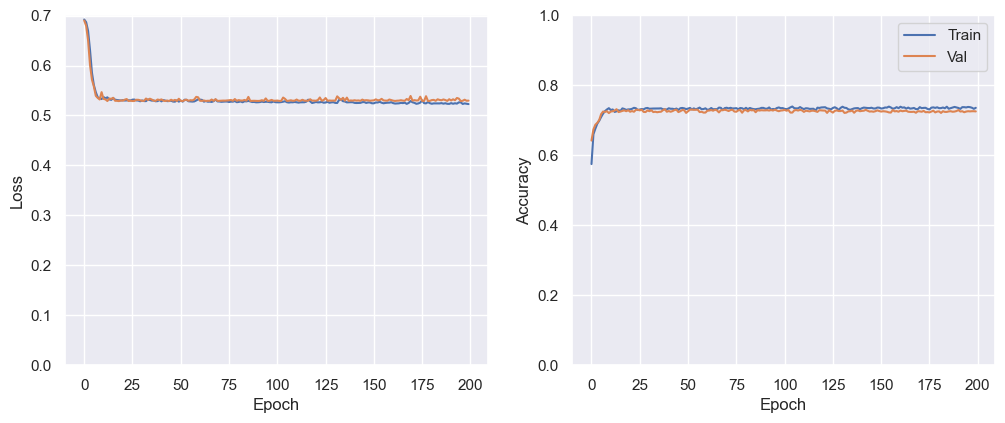

In [22]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_history(history):
    metrics =  ['loss', 'accuracy']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[1]
                 #, linestyle="-"
                 , label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.0,1])
        else:
            plt.ylim([0,1])

    plt.legend()

plot_history(history)

The neural network appears to be making progress in learning from the data. However, it is important to highlight that the training process stopped around epoch 20. Notably, the accuracy exhibited consistency without significant improvement beyond this point.

In [23]:
# Function to plot confussion matrix
def plot_confussion_matrix(labels, predictions, classes, figsize = 3):
    
    con_mat = tf.math.confusion_matrix(labels, predictions).numpy()

    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis = 1)[:, np.newaxis], decimals = 3)

    con_mat_df = pd.DataFrame(con_mat_norm,
                         index = classes, 
                         columns = classes)

    figure = plt.figure(figsize=(figsize, figsize))
    sns.heatmap(con_mat_df
                , annot=True
                , xticklabels=classes
                , yticklabels=classes
                #, cmap=plt.cm.Blues
                )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xlim(-0.0, len(classes))
    plt.ylim(len(classes), -0.0)
    plt.show()

In [24]:
# categorical columns which can be transformed into bin columns
GameOutcome = {'Blue Wins':1, 'Red Wins':0}
df['Win'] = df['Win'].map(GameOutcome)

65/65 [==============================] - 0s 604us/step


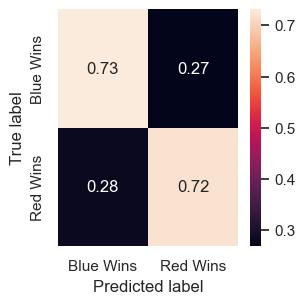

In [25]:
classes = GameOutcome
y_pred = model.predict(val_features)
y_pred

y_pred=np.argmax(y_pred,axis=1)
plot_confussion_matrix(labels = val_labels, predictions = y_pred, classes = classes, figsize = 3)

Our model consistently performs well, particularly in predicting Blue wins compared to Red wins. However, to further enhance our results, let's explore the other datasets and assess if we observe any improvements in our predictions.

#### 5.2 Model trained with correlated df

In [26]:
df_corr = df_corr.sample(frac=1)
target = "Win"

train_df, test_df = train_test_split(df_corr, test_size = test_size, random_state=0)
train_df, val_df = train_test_split(train_df, test_size = val_size, random_state=0)

# Form np arrays of labels and features.
train_features = np.array(train_df[train_df.columns.difference([target])])
val_features = np.array(val_df[val_df.columns.difference([target])])
test_features = np.array(test_df[test_df.columns.difference([target])])

train_labels = np.array(train_df[[target]])
val_labels = np.array(val_df[[target]])
test_labels = np.array(test_df[[target]])

input_len = train_features.shape[1]

shap_test_df = test_df.copy(deep = True)

In [27]:
def make_model(output_bias=None):
    # create model
    model = Sequential()
    # ================================Iput layer. Fully connected with inputs == to features in our df ====================
    model.add(Dense(units = input_len
                    , input_dim = input_len
                    , kernel_initializer='normal'
                    , activation='relu'))
    # ================================Second layer ====================
    model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
    # ================================Third layer =====================
    model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
    
    if output_bias is not None:
        output_bias = initializers.Constant(output_bias)
    else:
        output_bias = 'zeros'
        
    # ===============================Output Layer, sigmoid since our problem is binary ===================================
    model.add(Dense(2
                    , activation = 'softmax'
                    , kernel_initializer = 'normal'
                    , bias_initializer = output_bias))
    
    # Compile model. Use a common learning rate for starting, we'll adjust this later.
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    
    model.compile(optimizer = optimizer
                  , loss = 'sparse_categorical_crossentropy'
                  , metrics = ['accuracy'])
    
    return model

model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 3,506
Trainable params: 3,506
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(train_features,
                    train_labels,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (val_features, val_labels), 
                    verbose = 0)

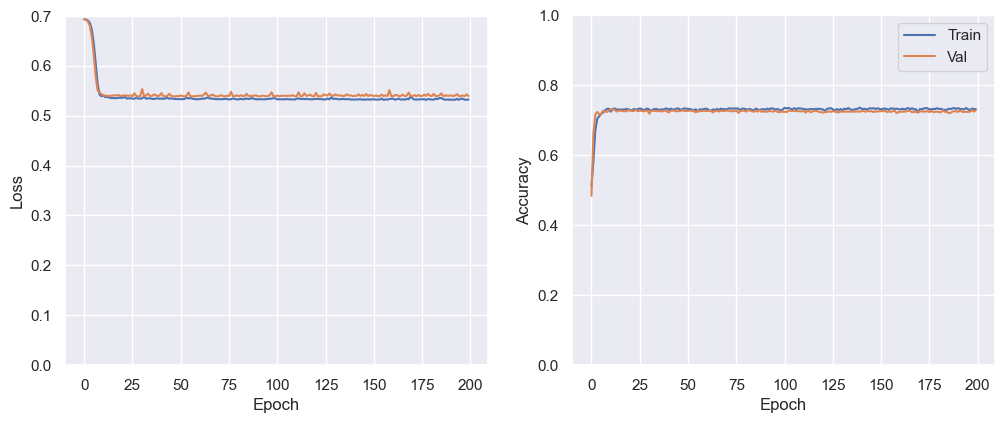

In [29]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_history(history):
    metrics =  ['loss', 'accuracy']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[1]
                 #, linestyle="-"
                 , label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.0,1])
        else:
            plt.ylim([0,1])

    plt.legend()

plot_history(history)

65/65 [==============================] - 0s 567us/step


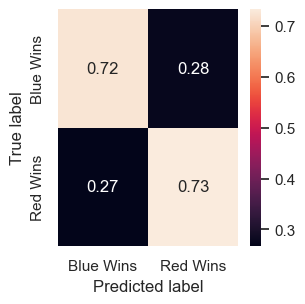

In [30]:
# categorical columns which can be transformed into bin columns
GameOutcome = {'Blue Wins':1, 'Red Wins':0}
df_corr['Win'] = df_corr['Win'].map(GameOutcome)

classes = GameOutcome
y_pred = model.predict(val_features)
y_pred

y_pred=np.argmax(y_pred,axis=1)
plot_confussion_matrix(labels = val_labels, predictions = y_pred, classes = classes, figsize = 3)

We've obtained very similar results. Let's try the with last dataset.

### 5.3 Model trained with lasso df

In [31]:
df_lasso = df_lasso.sample(frac=1)
target = "Win"

train_df, test_df = train_test_split(df_lasso, test_size = test_size, random_state=0)
train_df, val_df = train_test_split(train_df, test_size = val_size, random_state=0)

# Form np arrays of labels and features.
train_features = np.array(train_df[train_df.columns.difference([target])])
val_features = np.array(val_df[val_df.columns.difference([target])])
test_features = np.array(test_df[test_df.columns.difference([target])])

train_labels = np.array(train_df[[target]])
val_labels = np.array(val_df[[target]])
test_labels = np.array(test_df[[target]])

input_len = train_features.shape[1]

shap_test_df = test_df.copy(deep = True)

In [32]:
def make_model(output_bias=None):
    # create model
    model = Sequential()
    # ================================Iput layer. Fully connected with inputs == to features in our df ====================
    model.add(Dense(units = input_len
                    , input_dim = input_len
                    , kernel_initializer='normal'
                    , activation='relu'))
    # ================================Second layer ====================
    model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
    # ================================Third layer =====================
    model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
    
    if output_bias is not None:
        output_bias = initializers.Constant(output_bias)
    else:
        output_bias = 'zeros'
        
    # ===============================Output Layer, sigmoid since our problem is binary ===================================
    model.add(Dense(2
                    , activation = 'softmax'
                    , kernel_initializer = 'normal'
                    , bias_initializer = output_bias))
    
    # Compile model. Use a common learning rate for starting, we'll adjust this later.
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    
    model.compile(optimizer = optimizer
                  , loss = 'sparse_categorical_crossentropy'
                  , metrics = ['accuracy'])
    
    return model

model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 13)                182       
                                                                 
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,224
Trainable params: 3,224
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(train_features,
                    train_labels,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (val_features, val_labels), 
                    verbose = 0)

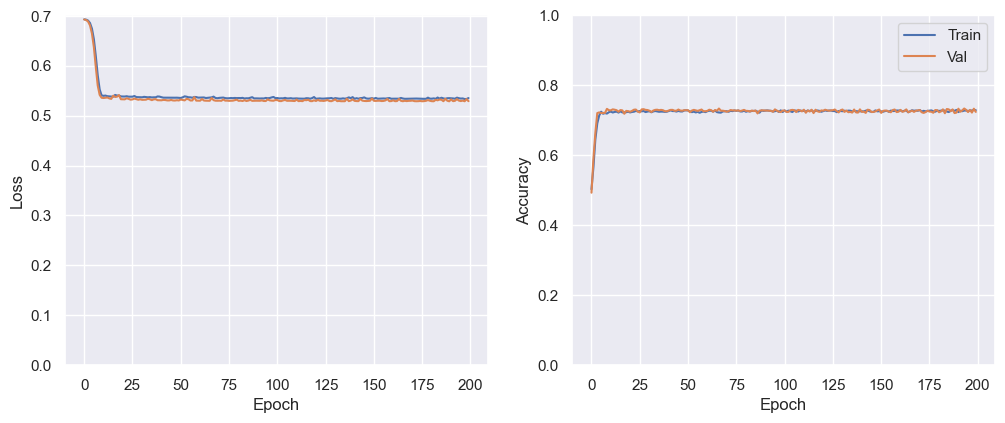

In [34]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_history(history):
    metrics =  ['loss', 'accuracy']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[1]
                 #, linestyle="-"
                 , label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.0,1])
        else:
            plt.ylim([0,1])

    plt.legend()

plot_history(history)

65/65 [==============================] - 0s 608us/step


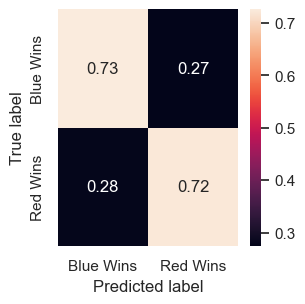

In [35]:
# categorical columns which can be transformed into bin columns
GameOutcome = {'Blue Wins':1, 'Red Wins':0}
df_lasso['Win'] = df_lasso['Win'].map(GameOutcome)

classes = GameOutcome
y_pred = model.predict(val_features)
y_pred

y_pred=np.argmax(y_pred,axis=1)
plot_confussion_matrix(labels = val_labels, predictions = y_pred, classes = classes, figsize = 3)

Once again, we observe similar results across the datasets. Therefore, I will continue working with the whole dataset as it offers a broader range of features. 

### Grid Search

In [36]:
def make_model(dense_layers = 4
               , dense_dropout = 0.0
               ,epochs=4
               , verbose = True):
    
    # create model
    model = Sequential()
    # Hidden Layers
    #____________________________________________________________________________
    for i in range(0,dense_layers):
            model.add(Dense(units = input_len
                        , input_dim = input_len
                        , kernel_initializer='normal'
                        , activation='relu'))

    #model.add(Dropout(dense_dropout))
        
    # Cost function Layer
    #____________________________________________________________________________
    model.add(Dense(2, activation='softmax', kernel_initializer='normal'))
    
    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer = optimizer,
                  loss='sparse_categorical_crossentropy' 
                  ,metrics = ['accuracy',precision, recall])
    if verbose:
        print('dense_layers :' + str(dense_layers))
        print('epochs: ' + str(epochs))
        print(model.summary())
        
    return model

model = make_model()

dense_layers :4
epochs: 4
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 13)                182       
                                                                 
 dense_14 (Dense)            (None, 13)                182       
                                                                 
 dense_15 (Dense)            (None, 13)                182       
                                                                 
 dense_16 (Dense)            (None, 2)                 28        
                                                                 
Total params: 756
Trainable params: 756
Non-trainable params: 0
_________________________________________________________________
None


Proposed 18 models
dense_layers :6
epochs: 4
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 13)                182       
                                                                 
 dense_18 (Dense)            (None, 13)                182       
                                                                 
 dense_19 (Dense)            (None, 13)                182       
                                                                 
 dense_20 (Dense)            (None, 13)                182       
                                                                 
 dense_21 (Dense)            (None, 13)                182       
                                                                 
 dense_22 (Dense)            (None, 13)                182       
                                                                 
 dense_23

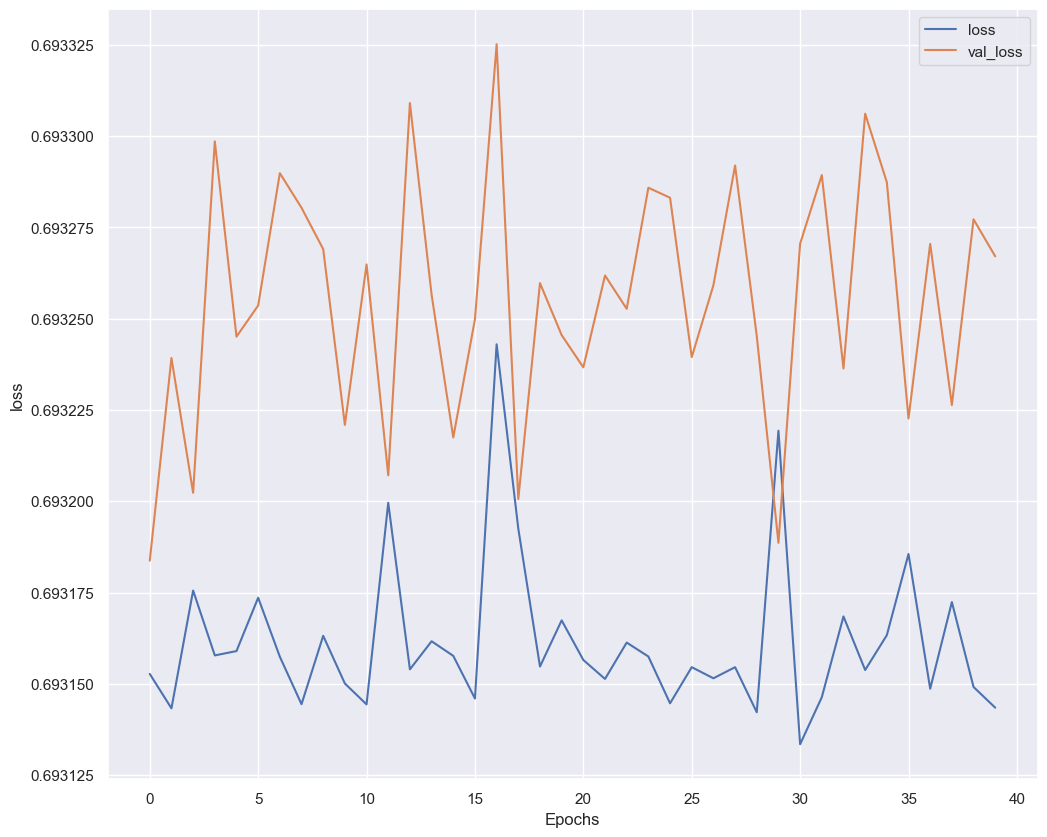

dense_layers :6
epochs: 4
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 13)                182       
                                                                 
 dense_25 (Dense)            (None, 13)                182       
                                                                 
 dense_26 (Dense)            (None, 13)                182       
                                                                 
 dense_27 (Dense)            (None, 13)                182       
                                                                 
 dense_28 (Dense)            (None, 13)                182       
                                                                 
 dense_29 (Dense)            (None, 13)                182       
                                                                 
 dense_30 (Dense)           

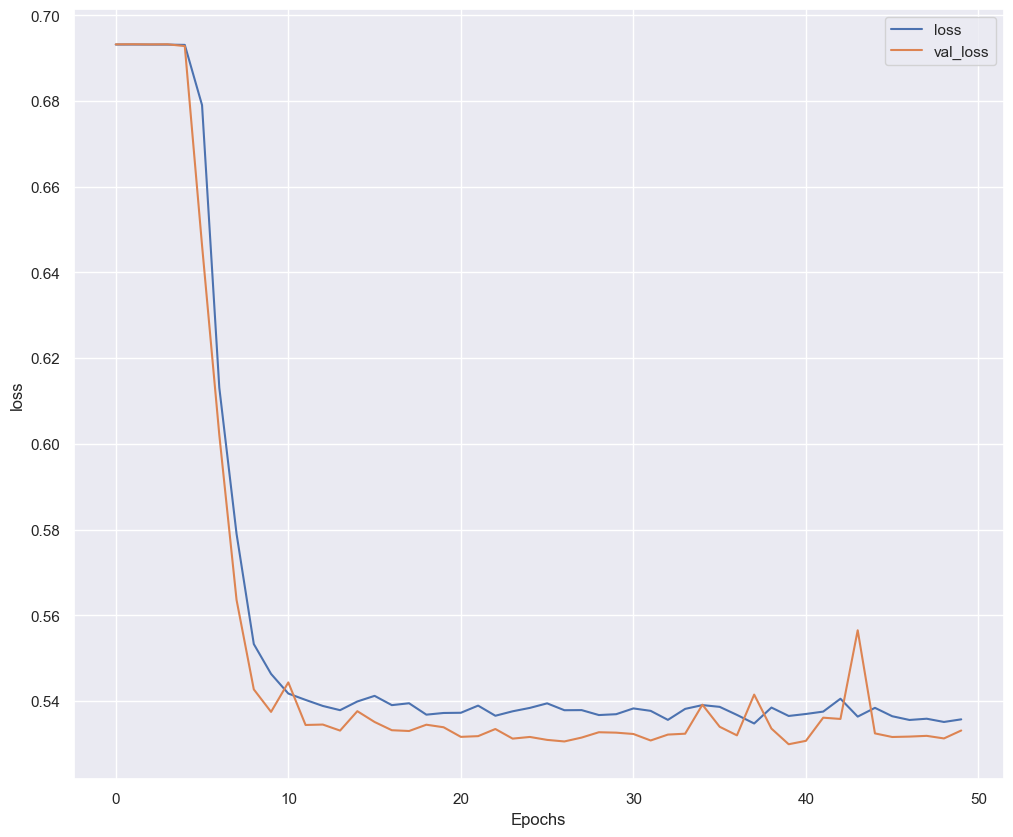

dense_layers :6
epochs: 4
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 13)                182       
                                                                 
 dense_32 (Dense)            (None, 13)                182       
                                                                 
 dense_33 (Dense)            (None, 13)                182       
                                                                 
 dense_34 (Dense)            (None, 13)                182       
                                                                 
 dense_35 (Dense)            (None, 13)                182       
                                                                 
 dense_36 (Dense)            (None, 13)                182       
                                                                 
 dense_37 (Dense)           

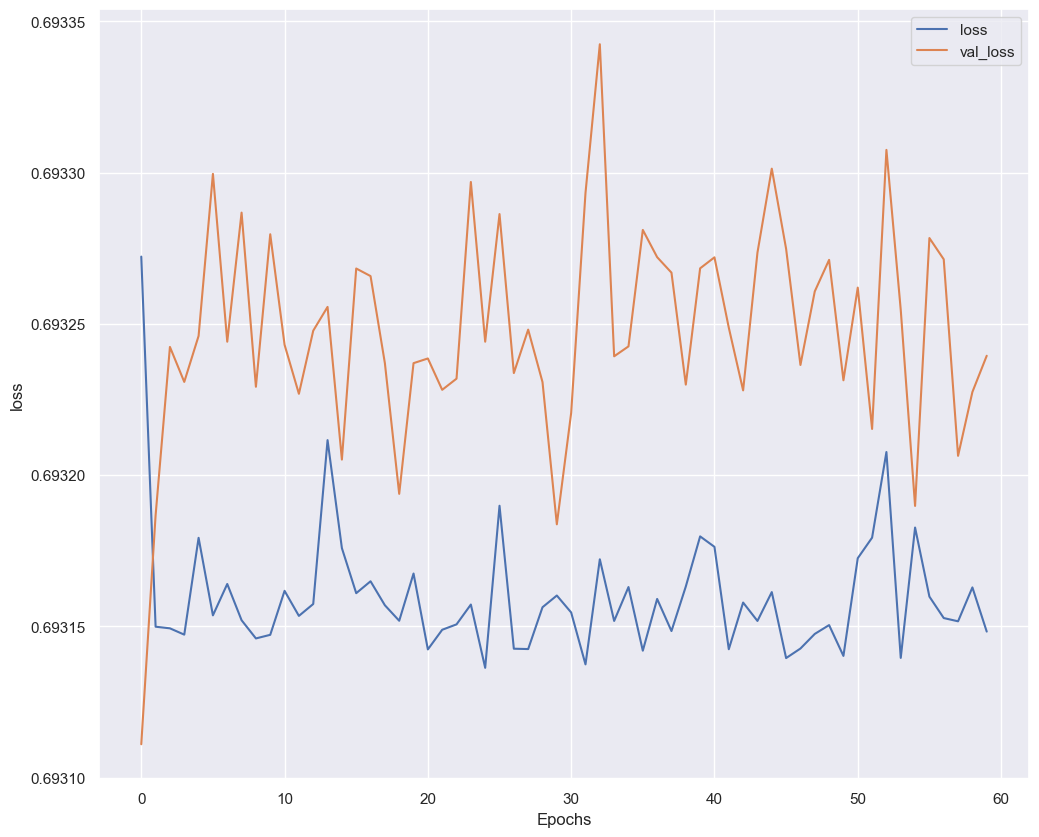

dense_layers :6
epochs: 4
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 13)                182       
                                                                 
 dense_39 (Dense)            (None, 13)                182       
                                                                 
 dense_40 (Dense)            (None, 13)                182       
                                                                 
 dense_41 (Dense)            (None, 13)                182       
                                                                 
 dense_42 (Dense)            (None, 13)                182       
                                                                 
 dense_43 (Dense)            (None, 13)                182       
                                                                 
 dense_44 (Dense)           

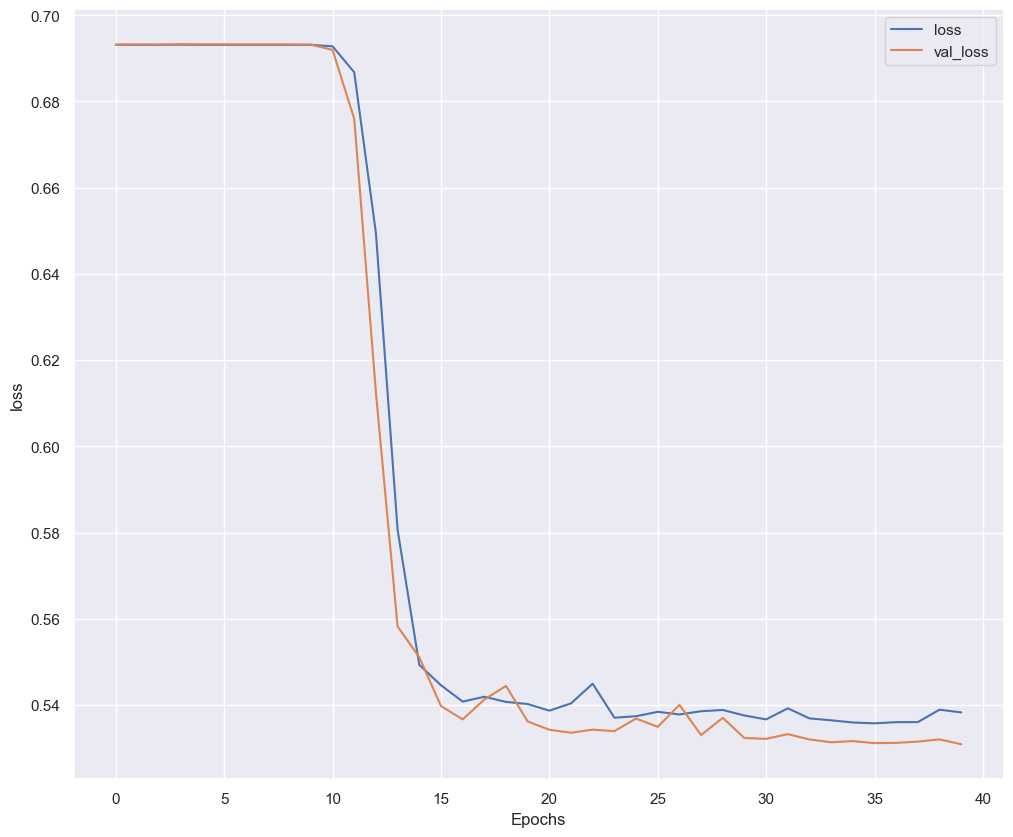

dense_layers :6
epochs: 4
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 13)                182       
                                                                 
 dense_46 (Dense)            (None, 13)                182       
                                                                 
 dense_47 (Dense)            (None, 13)                182       
                                                                 
 dense_48 (Dense)            (None, 13)                182       
                                                                 
 dense_49 (Dense)            (None, 13)                182       
                                                                 
 dense_50 (Dense)            (None, 13)                182       
                                                                 
 dense_51 (Dense)           

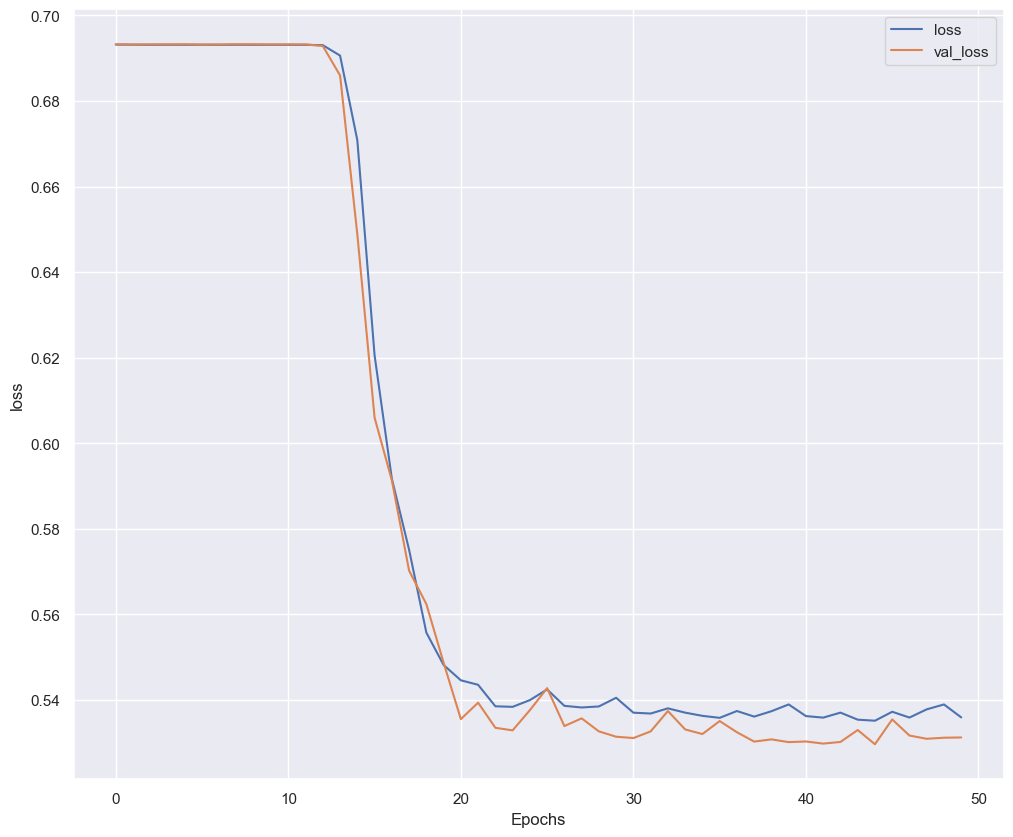

dense_layers :6
epochs: 4
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 13)                182       
                                                                 
 dense_53 (Dense)            (None, 13)                182       
                                                                 
 dense_54 (Dense)            (None, 13)                182       
                                                                 
 dense_55 (Dense)            (None, 13)                182       
                                                                 
 dense_56 (Dense)            (None, 13)                182       
                                                                 
 dense_57 (Dense)            (None, 13)                182       
                                                                 
 dense_58 (Dense)           

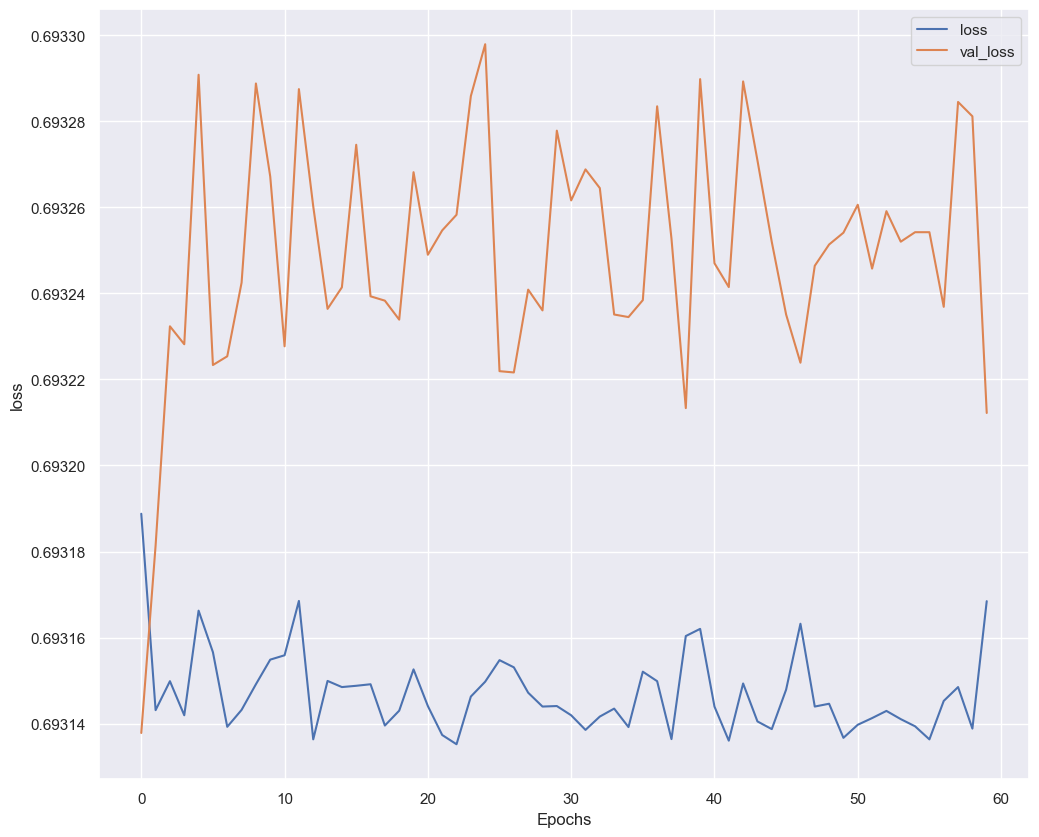

dense_layers :10
epochs: 4
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 13)                182       
                                                                 
 dense_60 (Dense)            (None, 13)                182       
                                                                 
 dense_61 (Dense)            (None, 13)                182       
                                                                 
 dense_62 (Dense)            (None, 13)                182       
                                                                 
 dense_63 (Dense)            (None, 13)                182       
                                                                 
 dense_64 (Dense)            (None, 13)                182       
                                                                 
 dense_65 (Dense)         

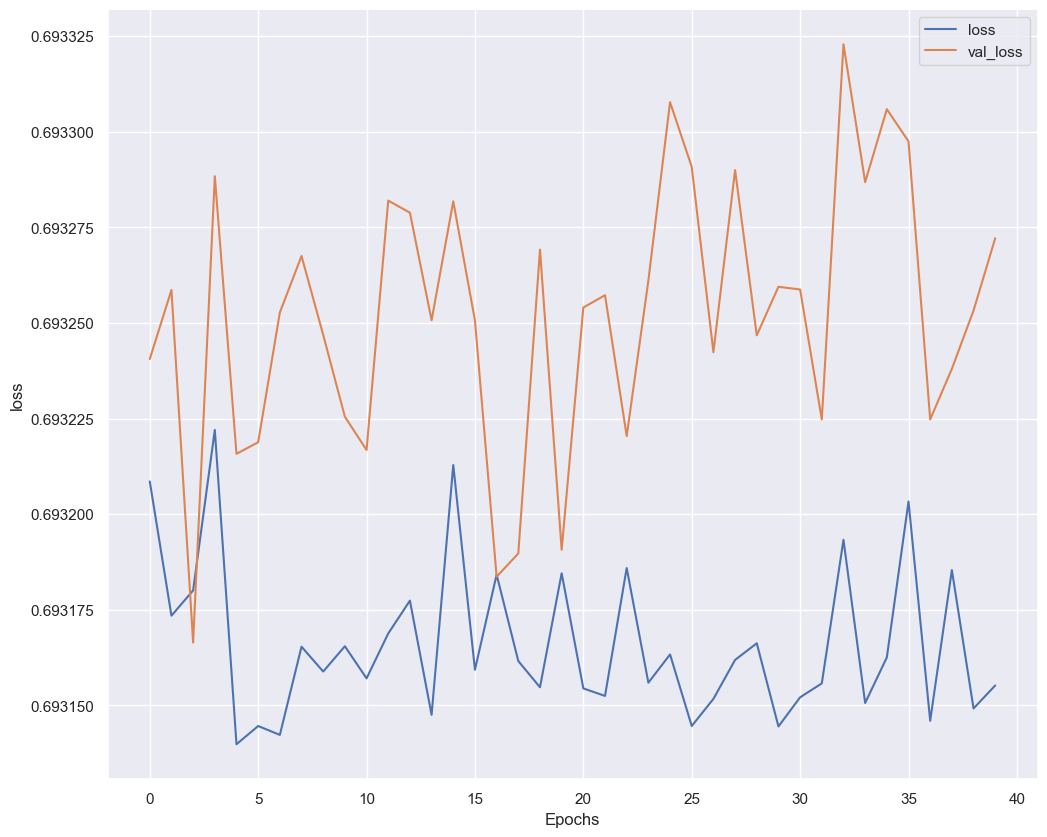

dense_layers :10
epochs: 4
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 13)                182       
                                                                 
 dense_71 (Dense)            (None, 13)                182       
                                                                 
 dense_72 (Dense)            (None, 13)                182       
                                                                 
 dense_73 (Dense)            (None, 13)                182       
                                                                 
 dense_74 (Dense)            (None, 13)                182       
                                                                 
 dense_75 (Dense)            (None, 13)                182       
                                                                 
 dense_76 (Dense)         

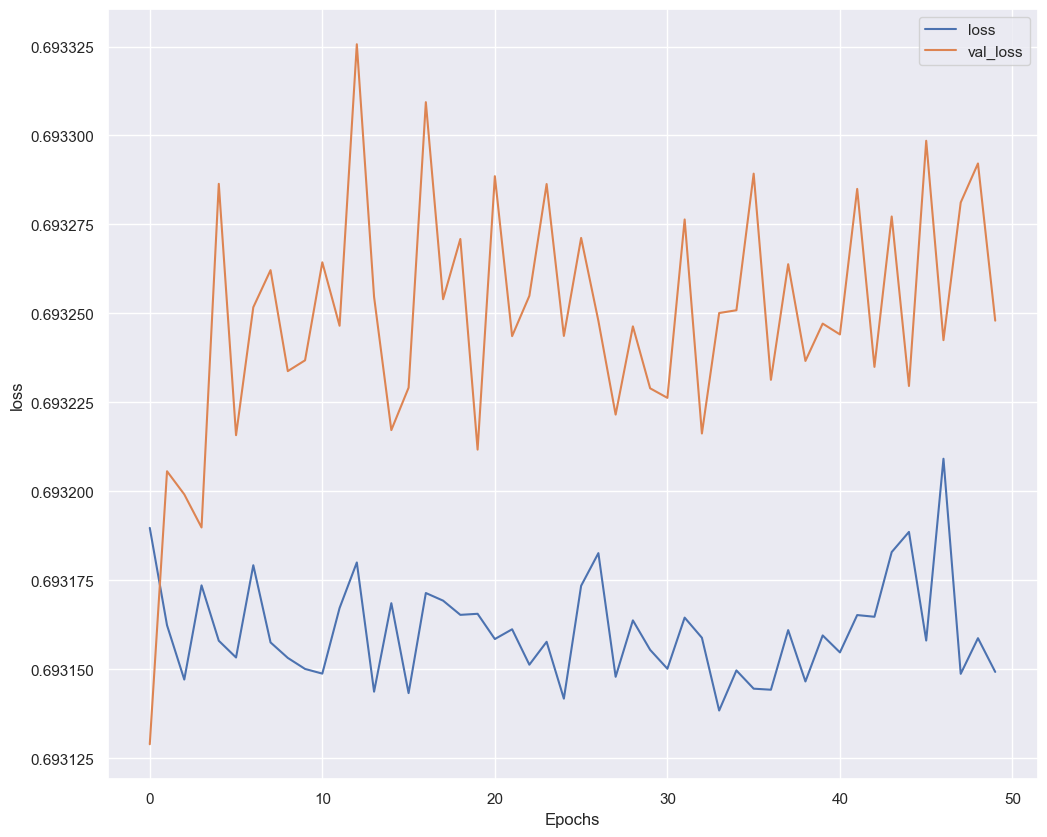

dense_layers :10
epochs: 4
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 13)                182       
                                                                 
 dense_82 (Dense)            (None, 13)                182       
                                                                 
 dense_83 (Dense)            (None, 13)                182       
                                                                 
 dense_84 (Dense)            (None, 13)                182       
                                                                 
 dense_85 (Dense)            (None, 13)                182       
                                                                 
 dense_86 (Dense)            (None, 13)                182       
                                                                 
 dense_87 (Dense)         

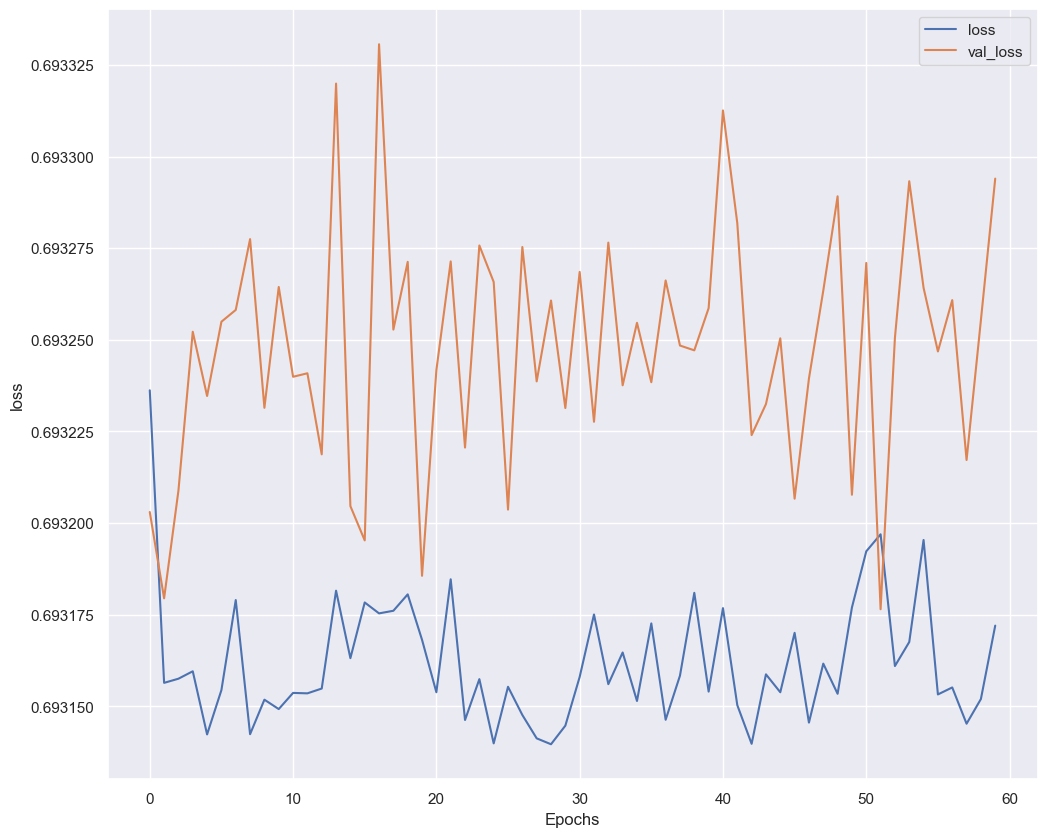

dense_layers :10
epochs: 4
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 13)                182       
                                                                 
 dense_93 (Dense)            (None, 13)                182       
                                                                 
 dense_94 (Dense)            (None, 13)                182       
                                                                 
 dense_95 (Dense)            (None, 13)                182       
                                                                 
 dense_96 (Dense)            (None, 13)                182       
                                                                 
 dense_97 (Dense)            (None, 13)                182       
                                                                 
 dense_98 (Dense)         

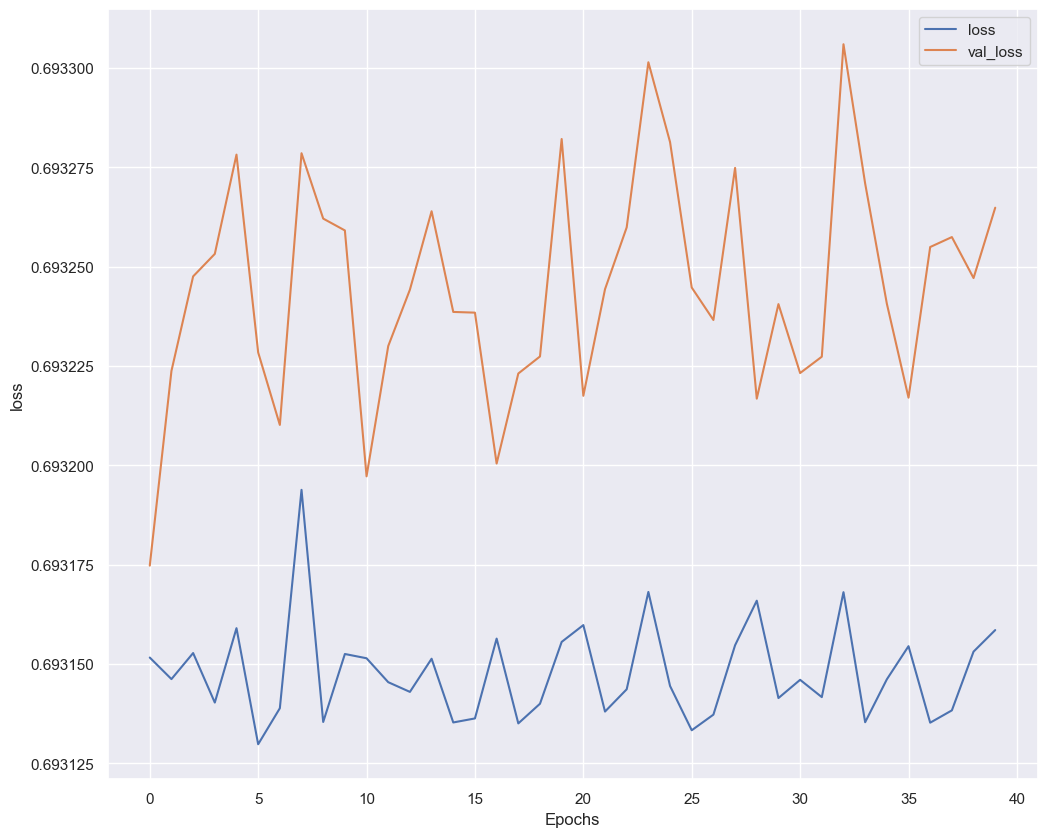

dense_layers :10
epochs: 4
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 13)                182       
                                                                 
 dense_104 (Dense)           (None, 13)                182       
                                                                 
 dense_105 (Dense)           (None, 13)                182       
                                                                 
 dense_106 (Dense)           (None, 13)                182       
                                                                 
 dense_107 (Dense)           (None, 13)                182       
                                                                 
 dense_108 (Dense)           (None, 13)                182       
                                                                 
 dense_109 (Dense)        

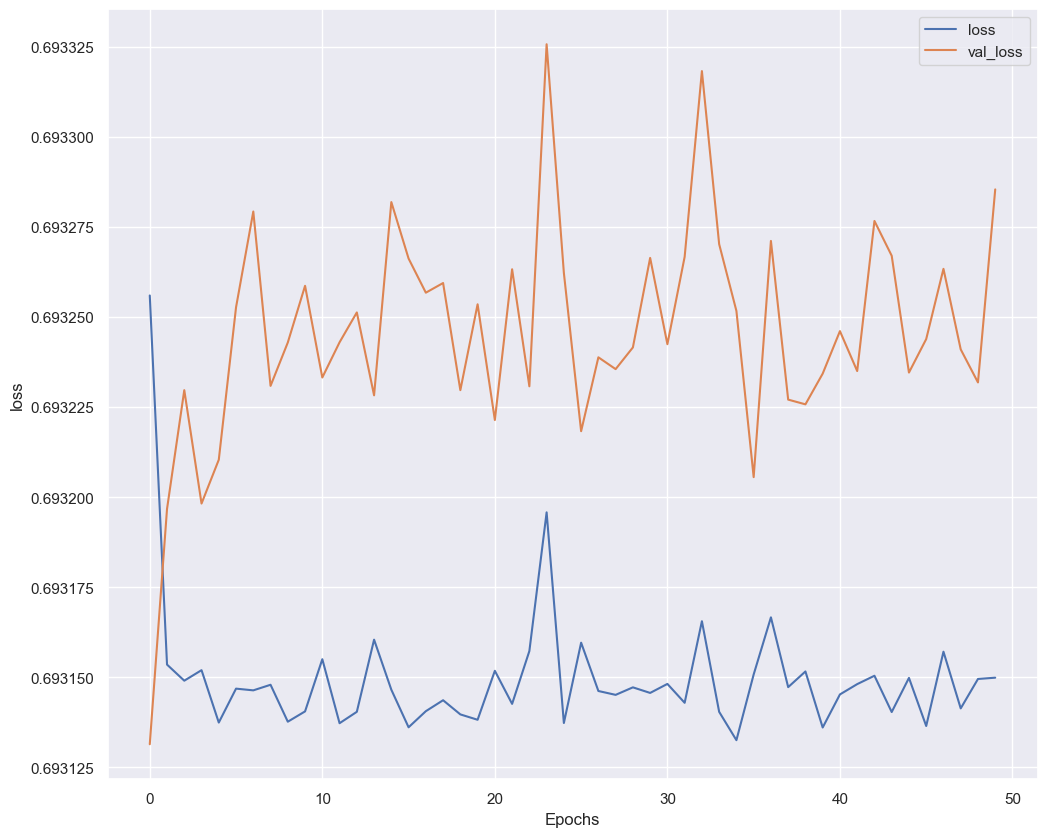

dense_layers :10
epochs: 4
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 13)                182       
                                                                 
 dense_115 (Dense)           (None, 13)                182       
                                                                 
 dense_116 (Dense)           (None, 13)                182       
                                                                 
 dense_117 (Dense)           (None, 13)                182       
                                                                 
 dense_118 (Dense)           (None, 13)                182       
                                                                 
 dense_119 (Dense)           (None, 13)                182       
                                                                 
 dense_120 (Dense)        

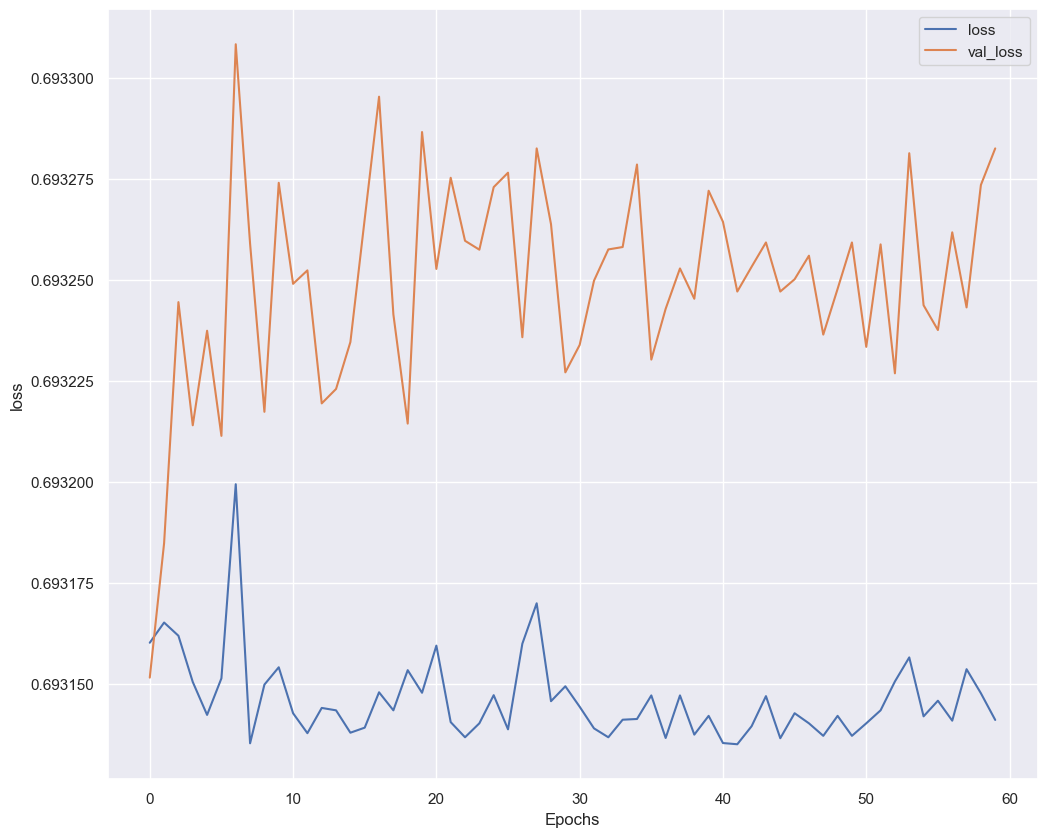

dense_layers :14
epochs: 4
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 13)                182       
                                                                 
 dense_126 (Dense)           (None, 13)                182       
                                                                 
 dense_127 (Dense)           (None, 13)                182       
                                                                 
 dense_128 (Dense)           (None, 13)                182       
                                                                 
 dense_129 (Dense)           (None, 13)                182       
                                                                 
 dense_130 (Dense)           (None, 13)                182       
                                                                 
 dense_131 (Dense)        

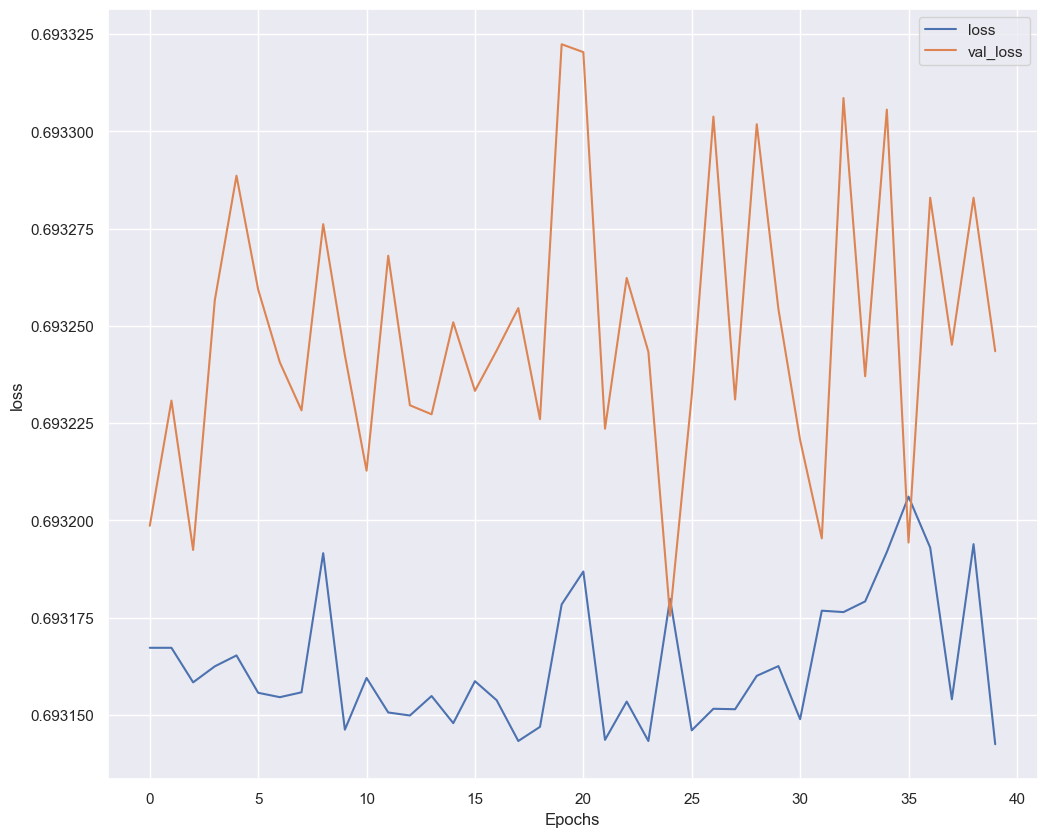

dense_layers :14
epochs: 4
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 13)                182       
                                                                 
 dense_141 (Dense)           (None, 13)                182       
                                                                 
 dense_142 (Dense)           (None, 13)                182       
                                                                 
 dense_143 (Dense)           (None, 13)                182       
                                                                 
 dense_144 (Dense)           (None, 13)                182       
                                                                 
 dense_145 (Dense)           (None, 13)                182       
                                                                 
 dense_146 (Dense)        

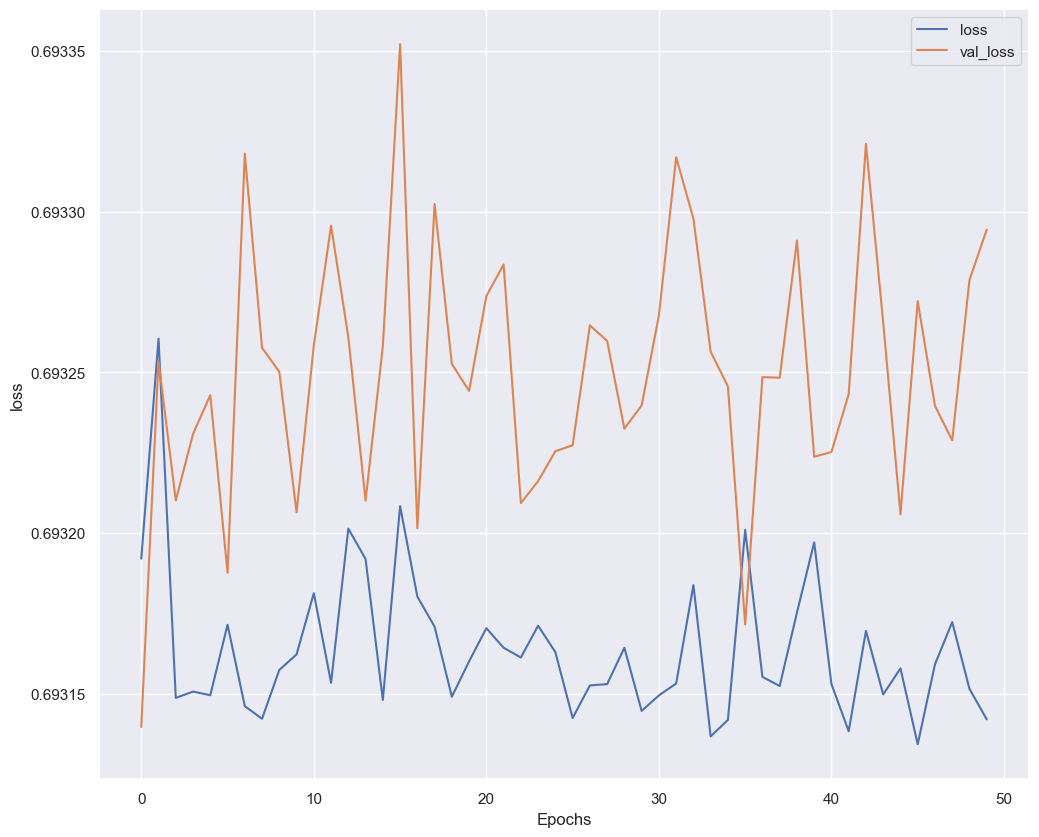

dense_layers :14
epochs: 4
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 13)                182       
                                                                 
 dense_156 (Dense)           (None, 13)                182       
                                                                 
 dense_157 (Dense)           (None, 13)                182       
                                                                 
 dense_158 (Dense)           (None, 13)                182       
                                                                 
 dense_159 (Dense)           (None, 13)                182       
                                                                 
 dense_160 (Dense)           (None, 13)                182       
                                                                 
 dense_161 (Dense)        

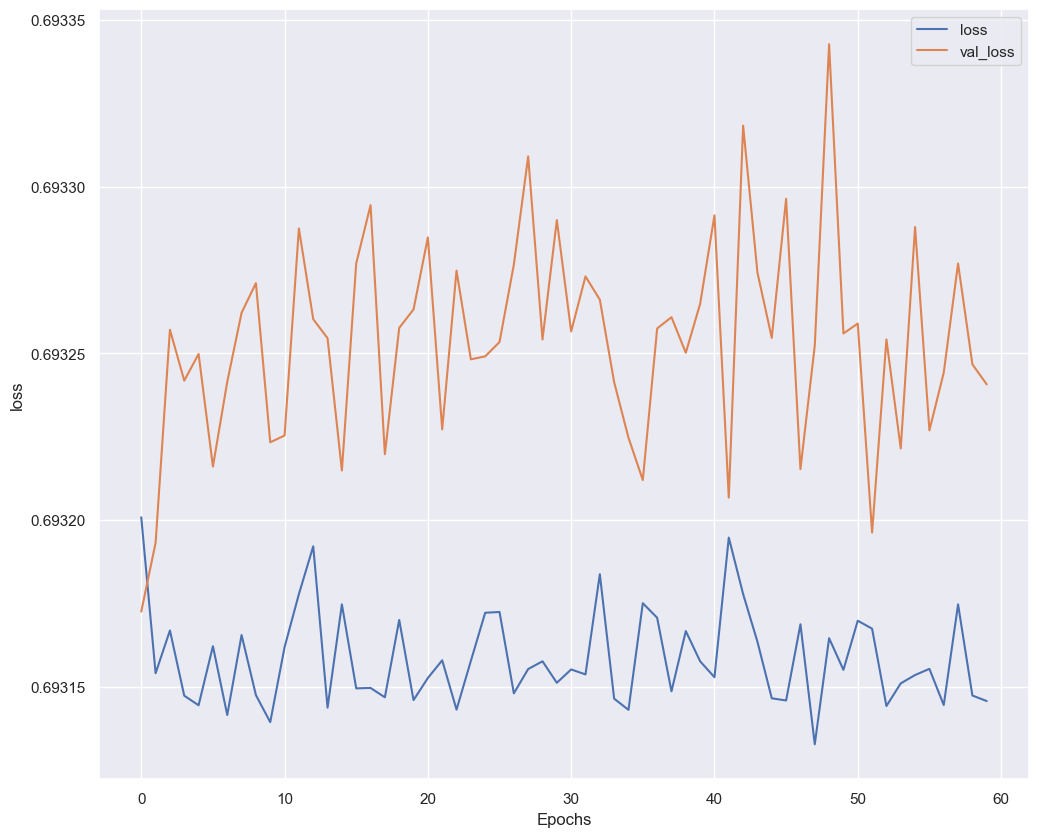

dense_layers :14
epochs: 4
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 13)                182       
                                                                 
 dense_171 (Dense)           (None, 13)                182       
                                                                 
 dense_172 (Dense)           (None, 13)                182       
                                                                 
 dense_173 (Dense)           (None, 13)                182       
                                                                 
 dense_174 (Dense)           (None, 13)                182       
                                                                 
 dense_175 (Dense)           (None, 13)                182       
                                                                 
 dense_176 (Dense)        

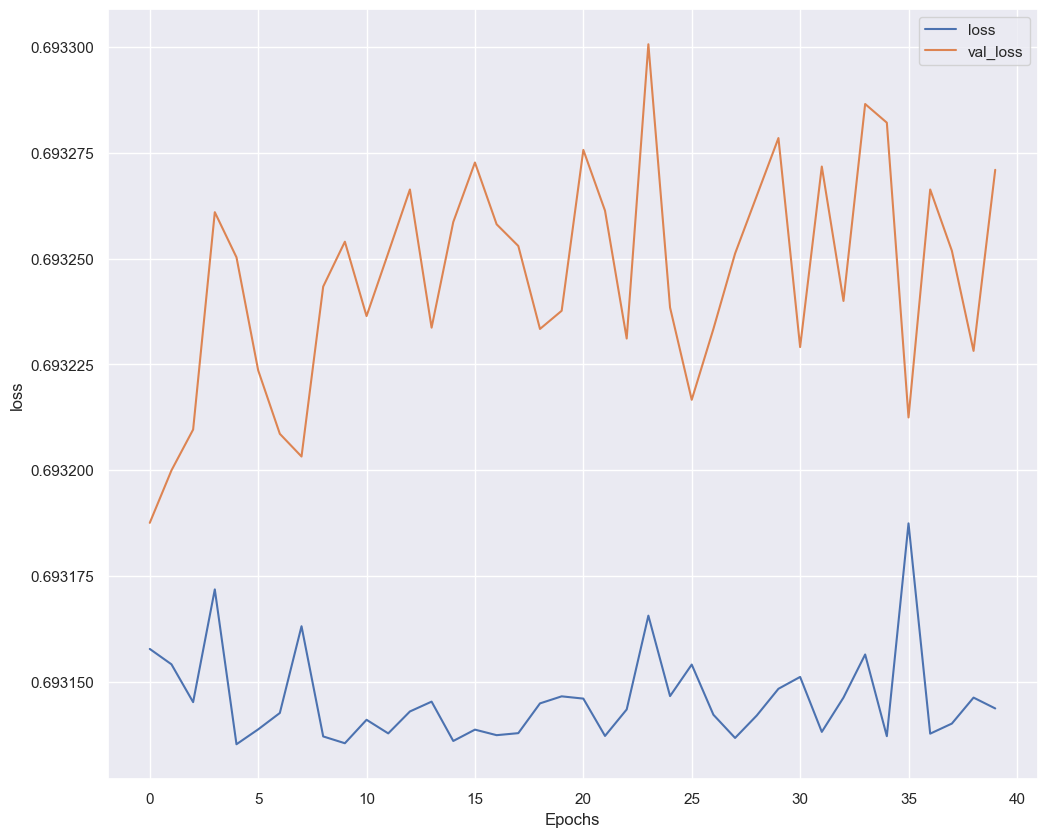

dense_layers :14
epochs: 4
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 13)                182       
                                                                 
 dense_186 (Dense)           (None, 13)                182       
                                                                 
 dense_187 (Dense)           (None, 13)                182       
                                                                 
 dense_188 (Dense)           (None, 13)                182       
                                                                 
 dense_189 (Dense)           (None, 13)                182       
                                                                 
 dense_190 (Dense)           (None, 13)                182       
                                                                 
 dense_191 (Dense)        

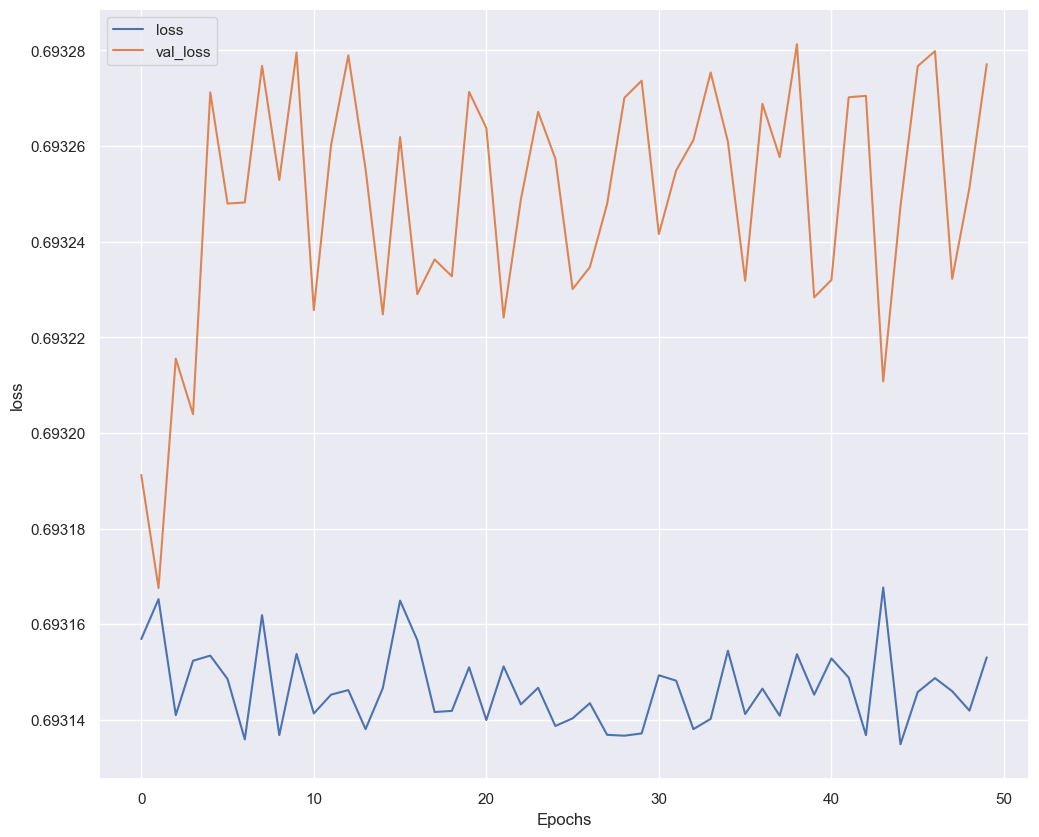

dense_layers :14
epochs: 4
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_200 (Dense)           (None, 13)                182       
                                                                 
 dense_201 (Dense)           (None, 13)                182       
                                                                 
 dense_202 (Dense)           (None, 13)                182       
                                                                 
 dense_203 (Dense)           (None, 13)                182       
                                                                 
 dense_204 (Dense)           (None, 13)                182       
                                                                 
 dense_205 (Dense)           (None, 13)                182       
                                                                 
 dense_206 (Dense)        

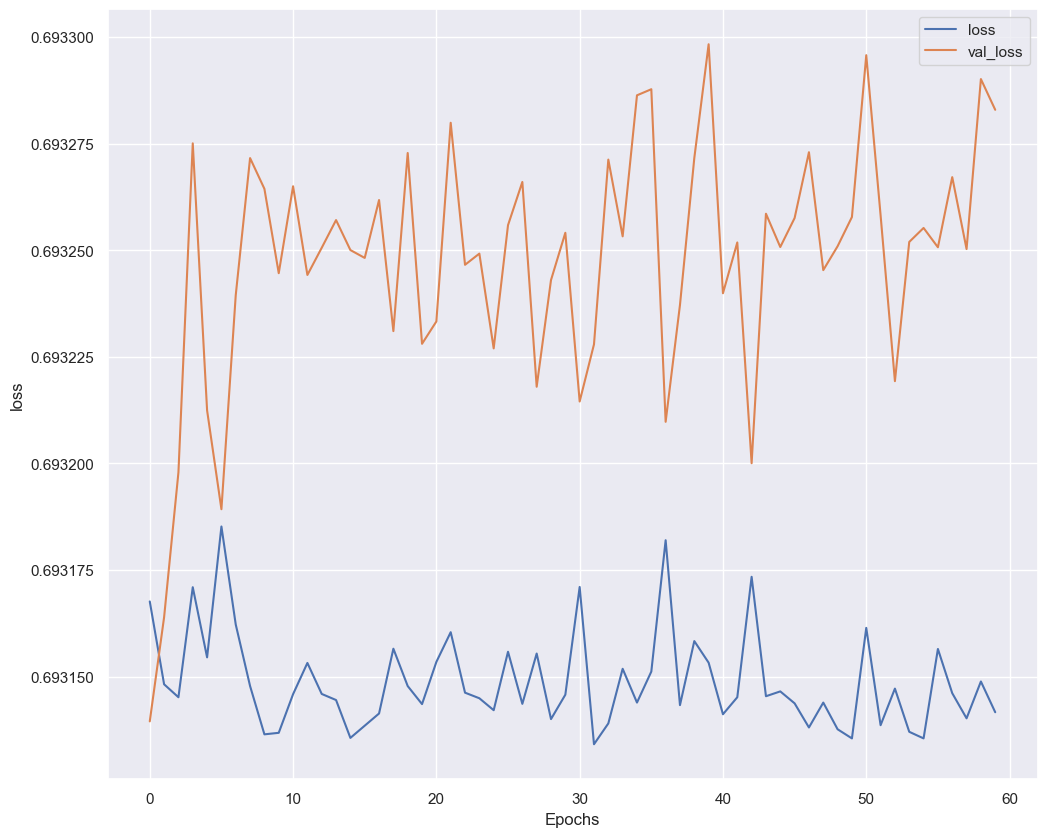

    dense_layers  batch_size  epochs  dense_dropout  accuracy  f1_score
0              6         128      40            0.0  0.491566  0.329564
1              6         128      50            0.0  0.730602  0.730201
2              6         128      60            0.0  0.491566  0.329564
3              6         256      40            0.0  0.727711  0.727646
4              6         256      50            0.0  0.730602  0.730446
5              6         256      60            0.0  0.491566  0.329564
6             10         128      40            0.0  0.491566  0.329564
7             10         128      50            0.0  0.491566  0.329564
8             10         128      60            0.0  0.491566  0.329564
9             10         256      40            0.0  0.491566  0.329564
10            10         256      50            0.0  0.491566  0.329564
11            10         256      60            0.0  0.491566  0.329564
12            14         128      40            0.0  0.491566  0

In [37]:
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.utils import to_categorical

dense_layers = [6, 10, 14]
batch_size = [128, 256]
epochs = [40, 50, 60]
dense_dropout = [0.0]
#RMS = [0.1, 0.01]

param_grid = dict(
    dense_layers=dense_layers,
    batch_size=batch_size,
    epochs=epochs,
    dense_dropout=dense_dropout
)

keys = param_grid.keys()
values = (param_grid[key] for key in keys)
param_grid = [dict(zip(keys, param_grid)) for param_grid in itertools.product(*values)]

print('Proposed ' + str(len(param_grid)) + ' models')

results = pd.DataFrame(param_grid)

for j in range(len(param_grid)):
    dense_layers = param_grid[j].get("dense_layers")
    batch_size = param_grid[j].get("batch_size")
    epochs = param_grid[j].get("epochs")
    dense_dropout = param_grid[j].get("dense_dropout")

    model = make_model(dense_layers=dense_layers, dense_dropout=dense_dropout, verbose=1)

    # Compile the model with appropriate loss function and metrics
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    train_labels_encoded = to_categorical(train_labels)
    val_labels_encoded = to_categorical(val_labels)

    history = model.fit(
        train_features,
        train_labels_encoded,  # Use one-hot encoded train_labels
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(val_features, val_labels_encoded),  # Use one-hot encoded val_labels
        verbose=0
    )

    # Evaluate the model on the validation set
    val_predictions = model.predict(val_features)
    val_predictions = np.argmax(val_predictions, axis=1)
    val_labels_argmax = val_labels

    # Calculate evaluation metrics
    accuracy = accuracy_score(val_labels_argmax, val_predictions)
    #precision = precision_score(val_labels_argmax, val_predictions, average='macro')
    f1 = f1_score(val_labels_argmax, val_predictions, average='macro')

    # Add the metrics to the results DataFrame
    results.at[j, 'accuracy'] = accuracy.item()  # Convert accuracy to a scalar value
    #results.at[j, 'precision'] = precision.item()  # Convert precision to a scalar value
    results.at[j, 'f1_score'] = f1.item()  # Convert F1 score to a scalar value

    plot_history_train(history, 'loss')

print(results)


Our best model is using the following hyperparameters:

dense_layers = 6
batch_size = 128
epochs = 40
dense_dropout = 0

Based on the absence of overfitting in our model, there is no need to incorporate dense_dropout regularization. 
Although the highest accuracy achieved was 0.72, it may not be the optimal score, but it still represents a decent performance.